# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

### Problem-1

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. What is the value of $n$ and $d$?

In [3]:
### Solution ###
X.shape

(2, 20)

### Problem-2

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

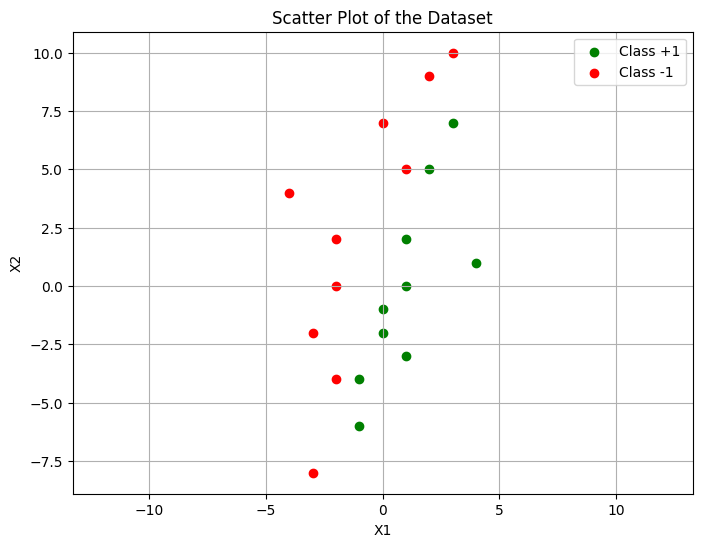

In [5]:
### Solution ###
plt.figure(figsize=(8, 6))
plt.scatter(X[0, y == 1], X[1, y == 1], color='green', label='Class +1')
plt.scatter(X[0, y == -1], X[1, y == -1], color='red', label='Class -1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of the Dataset')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### Problem-3

Compute the object $\mathbf{Y}$ that appears in the dual problem. What kind of an object is $\mathbf{Y}$?

In [7]:
### Solution ###
Y = np.diag(y)
print(Y)
print(Y.shape)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0

### Problem-4

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem and find the sum of its elements. What properties does the matrix $\mathbf{Q}$ have? What is the nature of the objective function?

In [8]:
### Solution ###
n = y.shape[0]
Q = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        Q[i, j] = y[i] * y[j] * np.dot(X[:, i], X[:, j])

# Sum of elements of Q
sum_Q = np.sum(Q)

print("Sum of elements in Q:", sum_Q)

Sum of elements in Q: 976.0


### Problem-5

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

<hr>

Write a function `loss` that returns the value of objective function $f(\boldsymbol{\alpha})$ for argument $\boldsymbol{\alpha}$. Compute the value of `loss` at $\boldsymbol{\alpha} = \mathbf{1}$.

**Note**: The reason for naming the function `loss` is that we will be using `SciPy`'s `scipy.optimize.minize` routine.

In [11]:
### Solution ###

# Define the loss function
def loss(alpha):
    alpha = np.array(alpha)
    return (1/2) * np.dot(alpha, Q @ alpha) - np.sum(alpha)

# Evaluate at alpha = 1
n = y.shape[0]
alpha_1 = np.ones(n)
loss_value = loss(alpha_1)

print("Loss at alpha = 1:", loss_value)

Loss at alpha = 1: 468.0


### Problem-6

Write a function named `jac` that computes the gradient, $\nabla f(\boldsymbol{\alpha})$, given $\boldsymbol{\alpha}$ as argument. Compute the value of `jac` at $\boldsymbol{\alpha} = \mathbf{1}$ and print the sum of the components of the gradient vector.

**Note**: `jac` stands for Jacobian. In our case, we don't have a vector valued function. So, this will just be the gradient.

In [12]:
### Solution ###

# Define the jacobian function
def jac(alpha):
    alpha = np.array(alpha)
    return Q @ alpha - np.ones_like(alpha)

# Evaluate at alpha = 1
n = y.shape[0]
alpha_1 = np.ones(n)
jac_value = jac(alpha_1)
sum_grad = np.sum(jac_value)

print("Sum of components of the gradient at alpha = 1:", sum_grad)

Sum of components of the gradient at alpha = 1: 956.0


### Problem-7

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Go through this [document](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to understand how `scipy.optimize.minimize` works. Few pointers:

(1)  You should pass five arguments to `scipy.optimize.minimize`: `loss`, `jac`, `alpha_init`, `method`, `Bounds`

(2) Use the method `SLSQP`. You can treat this as a black-box.

(3) Set the initial value of `alpha_init` to zero.

(4) Use `scipy.optimize.Bounds` to trigger the $\boldsymbol{\alpha} \geq 0$ constraint.

Compute the sum of components of the optimal solution, $\boldsymbol{\alpha}^*$. Enter the nearest integer as your answer.

In [13]:
from scipy.optimize import minimize, Bounds

In [14]:
### Solution ###

alpha_init = np.zeros(n)

# Bounds: alpha_i >= 0
bounds = Bounds([0]*n, [np.inf]*n)

# Solve using SLSQP
result = minimize(fun=loss,
                  x0=alpha_init,
                  jac=jac,
                  method='SLSQP',
                  bounds=bounds)

# Optimal alpha
alpha_opt = result.x
sum_alpha = np.sum(alpha_opt)

print("Sum of optimal alpha components (rounded):", round(sum_alpha))

Sum of optimal alpha components (rounded): 10


### Problem-8

Find all the support vectors. Print the indices (zero-indexing) in the data-matrix where these support vectors are found.

In [15]:
### Solution ###

# Use a small threshold to filter out numerical noise
support_vector_indices = np.where(alpha_opt > 1e-5)[0]

print("Support vector indices:", support_vector_indices.tolist())

Support vector indices: [6, 7, 8, 9, 18, 19]


### Problem-9

Find the optimal weight vector $\mathbf{w}^*$. Round each component of the optimal weight vector to the nearest integer.

In [16]:
### Solution ###

# Compute w* using alpha*, y, and X
w_star = np.sum((alpha_opt * y)[:, np.newaxis] * X.T, axis=0)

# Round to nearest integer
w_star_rounded = np.round(w_star).astype(int)

print("Optimal weight vector (rounded):", w_star_rounded.tolist())

Optimal weight vector (rounded): [3, -1]


### Problem-10

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot. How many red points lie on the supporting hyperplanes? How many green points lie on the supporting hyperplanes?

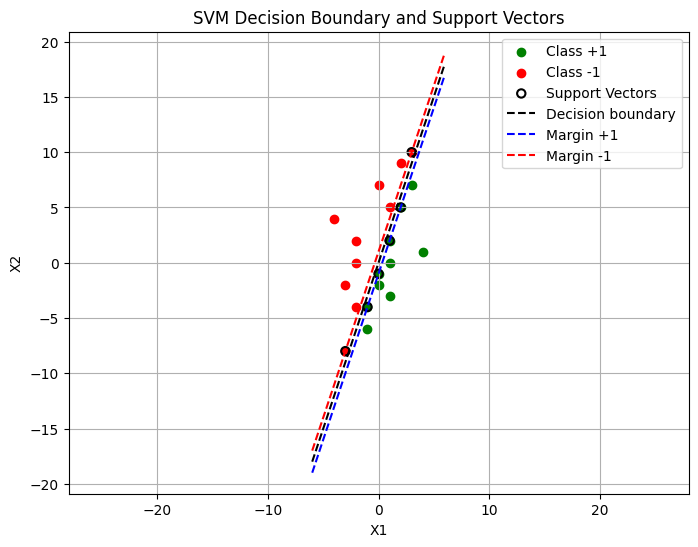

In [17]:
### Solution ###

import matplotlib.pyplot as plt

# Compute bias term b using support vectors
b_vals = [y[i] - np.dot(w_star, X[:, i]) for i in support_vector_indices]
b_star = np.mean(b_vals)

# Decision boundary: w^T x + b = 0 => x2 = -(w1*x1 + b)/w2
x1_vals = np.linspace(-6, 6, 200)
w1, w2 = w_star
decision = -(w1 * x1_vals + b_star) / w2
margin_plus = -(w1 * x1_vals + b_star - 1) / w2
margin_minus = -(w1 * x1_vals + b_star + 1) / w2

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[0, y == 1], X[1, y == 1], color='green', label='Class +1')
plt.scatter(X[0, y == -1], X[1, y == -1], color='red', label='Class -1')
plt.scatter(X[0, support_vector_indices], X[1, support_vector_indices],
            facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')

# Plot decision boundary and margins
plt.plot(x1_vals, decision, 'k--', label='Decision boundary')
plt.plot(x1_vals, margin_plus, 'b--', label='Margin +1')
plt.plot(x1_vals, margin_minus, 'r--', label='Margin -1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary and Support Vectors')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [18]:
red_supports = np.sum((y[support_vector_indices] == -1))
green_supports = np.sum((y[support_vector_indices] == 1))

print("Red support vectors:", red_supports)
print("Green support vectors:", green_supports)

Red support vectors: 2
Green support vectors: 4


## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [19]:
### Solution ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

# Data
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
              [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
              [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
              [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
              1, 1, 1, 1, 1,
              -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1])
n = y.shape[0]

# Compute Q matrix
Q = np.array([[y[i]*y[j]*np.dot(X[:, i], X[:, j]) for j in range(n)] for i in range(n)])

# Optimization function
def solve_svm(C):
    def loss(alpha):
        return 0.5 * np.dot(alpha, Q @ alpha) - np.sum(alpha)

    def jac(alpha):
        return Q @ alpha - np.ones_like(alpha)

    bounds = Bounds([0]*n, [C]*n)
    alpha_init = np.zeros(n)

    result = minimize(loss, alpha_init, jac=jac, method='SLSQP', bounds=bounds)
    alpha_opt = result.x

    # Compute weight vector
    w = np.sum((alpha_opt * y)[:, None] * X.T, axis=0)

    # Compute bias using support vectors within margin (0 < α < C)
    sv_indices = np.where((alpha_opt > 1e-5) & (alpha_opt < C - 1e-5))[0]
    if len(sv_indices) > 0:
        b = np.mean([y[i] - np.dot(w, X[:, i]) for i in sv_indices])
    else:
        b = 0  # fallback

    return w, b, alpha_opt

### Problem-11

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


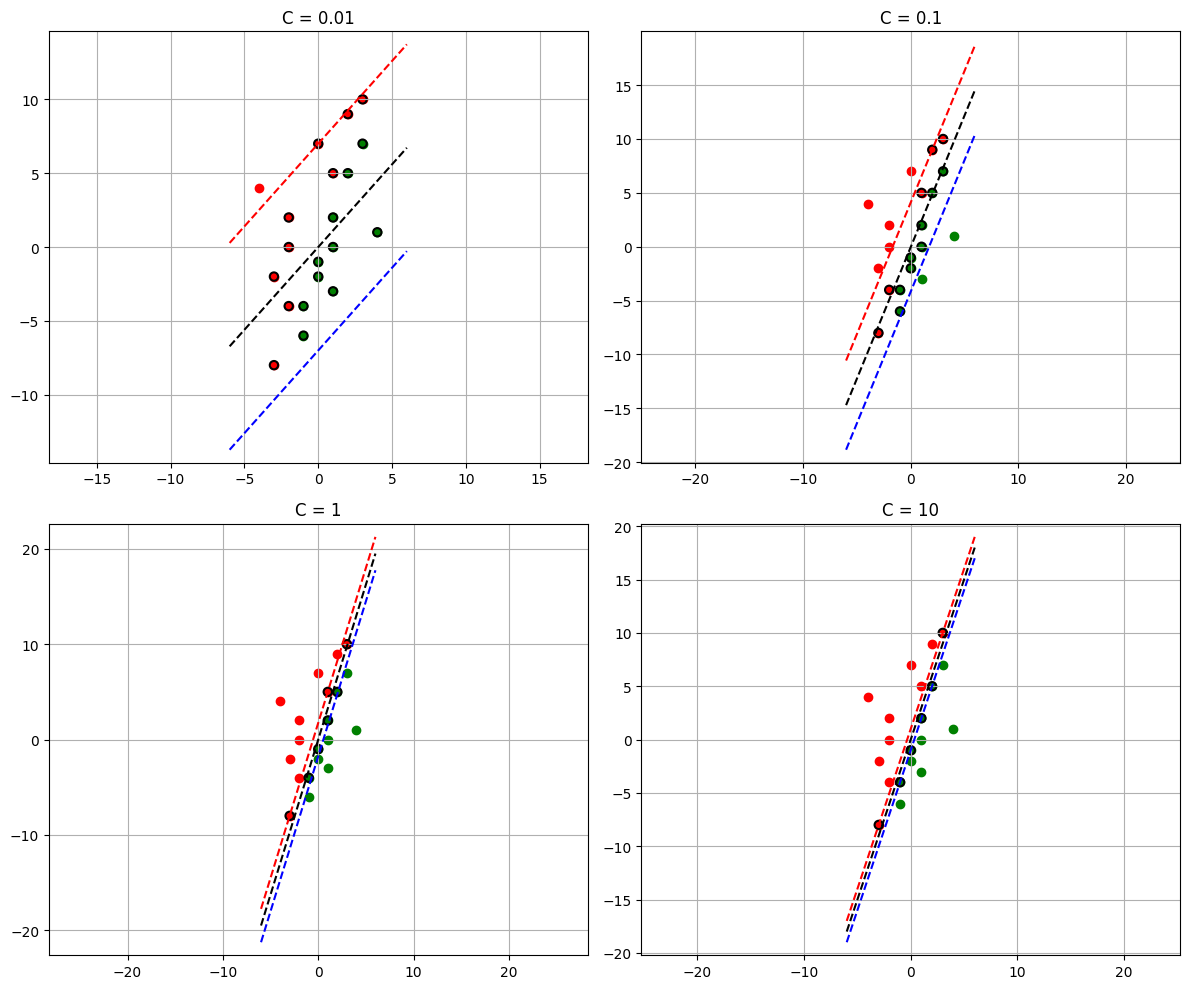

In [20]:
### Solution ###

# Plot decision boundaries for different C values
C_values = [0.01, 0.1, 1, 10]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for idx, C in enumerate(C_values):
    w, b, alpha = solve_svm(C)
    sv_indices = np.where(alpha > 1e-5)[0]

    x1_vals = np.linspace(-6, 6, 200)
    decision = -(w[0]*x1_vals + b)/w[1]
    margin_plus = -(w[0]*x1_vals + b - 1)/w[1]
    margin_minus = -(w[0]*x1_vals + b + 1)/w[1]

    ax = axs[idx//2, idx%2]
    ax.set_title(f"C = {C}")
    ax.scatter(X[0, y==1], X[1, y==1], color='green', label='Class +1')
    ax.scatter(X[0, y==-1], X[1, y==-1], color='red', label='Class -1')
    ax.scatter(X[0, sv_indices], X[1, sv_indices], facecolors='none',
               edgecolors='black', linewidths=1.5, label='Support Vectors')
    ax.plot(x1_vals, decision, 'k--')
    ax.plot(x1_vals, margin_plus, 'b--')
    ax.plot(x1_vals, margin_minus, 'r--')
    ax.grid(True)
    ax.axis('equal')

plt.tight_layout()
plt.show()


### Problem-12

For $C = 10$, how many support vectors does the model have? Observe where these points lie. Does this observation tally with your understanding of the last few minutes of the soft-SVM lecture where professor summarizes the relationship between $\alpha^{*}$ and the supporting hyperplanes?

In [21]:
### Solution ###

C = 10
w, b, alpha_C10 = solve_svm(C)
support_indices = np.where(alpha_C10 > 1e-5)[0]

print("Number of support vectors for C=10:", len(support_indices))

Number of support vectors for C=10: 6


### Problem-13

For $C = 10$, find the most critical support vectors, that is, those points for which $\alpha^{*}_i = C$.

In [22]:
### Solution ###

critical_sv_indices = np.where(np.isclose(alpha_C10, C))[0]
print("Critical support vectors (alpha = C):", critical_sv_indices.tolist())

Critical support vectors (alpha = C): []
